# Logic definitions

In [1]:
type ∨[P, Q] = Either[P, Q]
type ∧[P, Q] = Tuple2[P, Q]
type ⟶[P, Q] = P => Q
type ⊥ = Nothing
type True = Unit
type ¬[P] = P => ⊥ 

defined type ∨
defined type ∧
defined type ⟶
defined type ⊥
defined type True
defined type ¬

In [12]:
type Or[P, Q] = Either[P, Q]
type And[P, Q] = Tuple2[P, Q]
type Implies[P, Q] = P => Q
type False = Nothing
type True = Unit
type Not[P] = P => ⊥ 

defined type Or
defined type And
defined type Implies
defined type False
defined type True
defined type Not

# Knights and Knaves

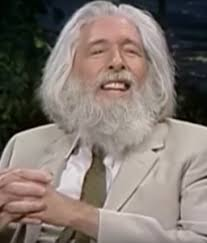
Raymond Smullyan

In [2]:
class Inhabitant{ x => 
    // Knight(x) -- `x` is a Knight
    // 
    type Knight
    
    // Knave(x) -- `x` is a Knave (i.e. is not a Knight)
    // 
    type Knave = ¬[Knight]
    
    // Says(x, P) -- `x` says that `P` holds, i.e. asserts proposition `P`
    // 
    type Says[P]
}

defined class Inhabitant

In [3]:
trait KnightsKnaves{
    // P1. Inhabitants are knights or knaves
    // 
    //     ∀ x. Inhabitant(x) ⟶ Knight(x) ∨ Knave(x) 
    // 
    def P1(x: Inhabitant): x.Knight ∨ x.Knave
    
    // In Scala 3
    // val P1: (x: Inhabitant) => Either[x.Knight, x.Knave]
    
    // P2. Knights are truth tellers
    // 
    //     ∀ P. ∀ x. Knight(x) ⟶ Says(x, P) ⟶ P
    // 
    def P2[P](x: Inhabitant): x.Knight => x.Says[P] => P
    
    // In Scala 3
    // val P2: [P] => (x: Inhabitant) => x.Knight => x.Says[P] => P
    
    // P3. Knaves are persistent liers
    // 
    //     ∀ P. ∀ x. Knight(x) ⟶ Says(x, P) ⟶ ¬P
    // 
    def P3[P](x: Inhabitant): x.Knave => x.Says[P] => ¬[P]
}

defined trait KnightsKnaves

# Puzzle 1. 

## Is it possible for any inhabitant of this island to claim that he is a knave?

### No; no inhabitant can claim to be a knave because no knight would lie and say he is a knave and no knave would truthfully admit to being a knave.


In [ ]:
// { P1, P2, P3 } ⊢ ∀ x. Inhabitant(x) ⟶ ¬Says(x, Knave(x))

def puzzle1(premises: KnightsKnaves)(x: Inhabitant): ¬[x.Says[x.Knave]] = 
    // 1. Says(x, Knave(x))                                       ; hypothesis
    ((_1: x.Says[x.Knave]) => 
         (premises.P1(x) match {
             // 2. Knight(x)                                      ; hypothesis
             case Left(_2: x.Knight) => 
                 //   3. Knight(x) → Says(x, Knave(x)) → Knave(x) ; P2[Knave(x),x]
                 val _3: x.Knight => x.Says[x.Knave] => x.Knave = premises.P2[x.Knave](x)
                 //   4. Says(x, Knave(x)) → Knave(x)             ; ⟶E(3,2)
                 val _4: x.Says[x.Knave] => x.Knave = _3(_2)
                 //   5. Knave(x)                                 ; ⟶E(4,1)
                 //   5. ¬ Knight(x)                              ; ≝ Knave
                 //   5. Knight(x) → ⊥                            ; ≝ ¬ 
                 val _5: x.Knight => ⊥ = _4(_1)
                 //   6. ⊥                                        ; ⟶E(5,2)
                 _5(_2) : ⊥

             //  _7. Knave(x)                                     ; hypothesis
             case Right(_7: x.Knave) => 
                 //   8. Knave(x) → Says(x, Knave(x)) → ¬ Knave(x) ; P3[Knave(x),x]
                 val _8: x.Knave => x.Says[x.Knave] => ¬[x.Knave] = premises.P3[x.Knave](x)
                 //   9. Says(x, Knave(x)) → ¬ Knave(x)            ; ⟶E(8,7)
                 val _9: x.Says[x.Knave] => ¬[x.Knave] = _8(_7)
                 //   10. ¬ Knave(x)                               ; ⟶E(9,1)
                 //   10. Knave(x) → ⊥                             ; ≝ ¬ 
                 val _10: x.Knave => ⊥ = _9(_1)
                 //  11. ⊥                                         ; ⟶E(10,7)
                 _10(_7) : ⊥

        // _12. ⊥                                                  ; ∨E(P1, 2-6, 7-11)
        }) : False

    // _13. Says(x, Knave(x)) ⟶ ⊥                                  ; ⟶I(1-12)
    // _13. ¬ Says(x, Knave(x))                                    ; ≝ ¬ 
    ) : ¬[x.Says[x.Knave]]

In [13]:
implicit class SomeSugar(P: KnightsKnaves){    
    def eitherKnightOrKnave(x: Inhabitant): x.Knight Or x.Knave = P.P1(x)
    def knightsAreTruthTellers[P](x: Inhabitant) = P.P2[P](x)
    def knavesAreLiers[P](x: Inhabitant) = P.P3[P](x)
    
    def noKnightLies[P](x: Inhabitant): x.Knight => x.Says[Not[P]] => P => False = 
        xIsKnight => xSaysNotP => p => 
            P.P2[Not[P]](x)(xIsKnight)(xSaysNotP)(p)
    
    def noKnaveTellsTruth[P](x: Inhabitant): x.Knave => x.Says[P] => P => False = 
        xIsKnave => xSaysP => p => 
            P.P3[P](x)(xIsKnave)(xSaysP)(p)
}


defined class SomeSugar

In [17]:
// { P1, P2, P3 } ⊢ ∀ x. Inhabitant(x) ⟶ ¬ Says(x, Knave(x))

def puzzle1(premises: KnightsKnaves)(x: Inhabitant): Not[x.Says[x.Knave]] =
    xSaysIsKnave =>
        premises.eitherKnightOrKnave(x).fold(
            xIsKnight => 
                // no knight would lie
                premises.noKnightLies(x)(xIsKnight)(xSaysIsKnave)(xIsKnight),
            xIsKnave => 
                // no knave would tell the truth
                premises.noKnaveTellsTruth(x)(xIsKnave)(xSaysIsKnave)(xIsKnave)
        )

defined function puzzle1